## Import Libraries


In [1]:
# import libraies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

# import warnings
import warnings
warnings.filterwarnings('ignore')

## Import and Load the Data


In [2]:
# import the data
df = sns.load_dataset("iris")

# show the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# show the tail of the data
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Exploratory Data Analysis


### 1. Data Overview


In [4]:
# show the shape of the data
df.shape

(150, 5)

In [5]:
# show the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# show the summary statistics of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Check if there any missing values in the dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

So, Dataset is fine. No missing values found.


### Encoding of Categorical Features


In [18]:
# check the unique values in the target variable
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
# check the count of each class
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [20]:
# initialize the label encoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

In [21]:
# convert the encoded values to float
df["species"] = df["species"].astype(float)

### Correlation Between Features


<Axes: >

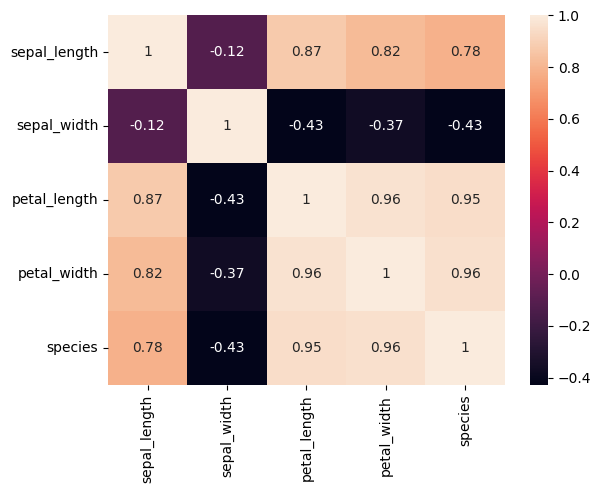

In [22]:
# correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

### Detailed Plotting


<Axes: xlabel='species', ylabel='sepal_length'>

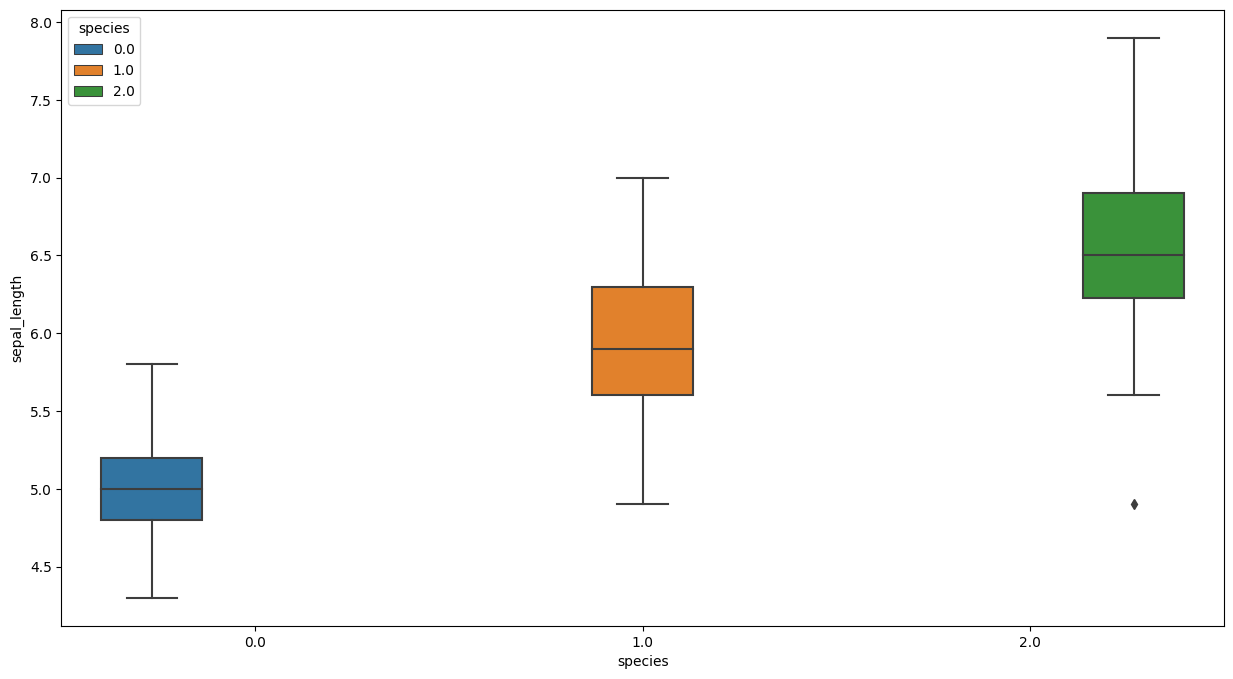

In [23]:
# relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='species', y='sepal_length', data=df.sort_values('sepal_length', ascending=False), hue='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

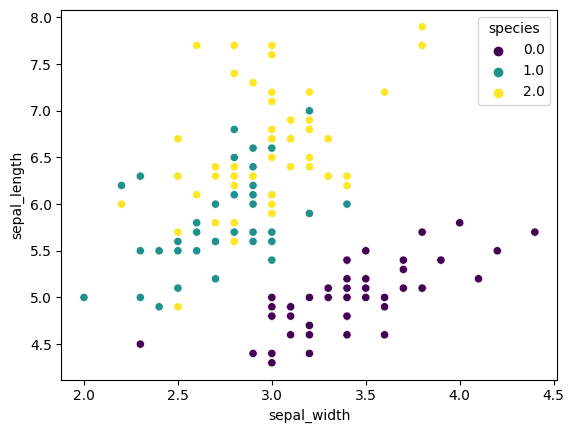

In [24]:
# Relationship between species and sepal width
sns.scatterplot(df, x='sepal_width', y='sepal_length', hue='species', palette='viridis')

## Data Preprocessing


### Feature Scaling


In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature columns (excluding the target 'species')
X_scaled = scaler.fit_transform(df.drop('species', axis=1))

# Update the dataframe
df_scaled = pd.DataFrame(X_scaled, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Add the species column back to the scaled dataframe
df_scaled['species'] = df['species']


In [32]:
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,0.0


## Data Splitting


In [33]:
# define features (X) and target (y)
X = df_scaled.drop("species", axis=1)
y = df_scaled["species"]

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the sizes of the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Model Selection


### 1. Logistic Regression


In [34]:
from sklearn.linear_model import LogisticRegression

# initialize the model
log_reg = LogisticRegression()

# fit the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
# make predictions
y_pred = log_reg.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



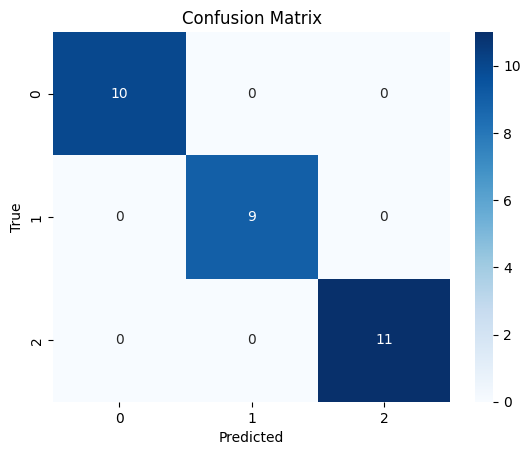

In [36]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 2. Decision Tree Classifier


In [37]:
from sklearn.tree import DecisionTreeClassifier

# initialize the model
dtc = DecisionTreeClassifier()

# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# predict the model
y_pred = dtc.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



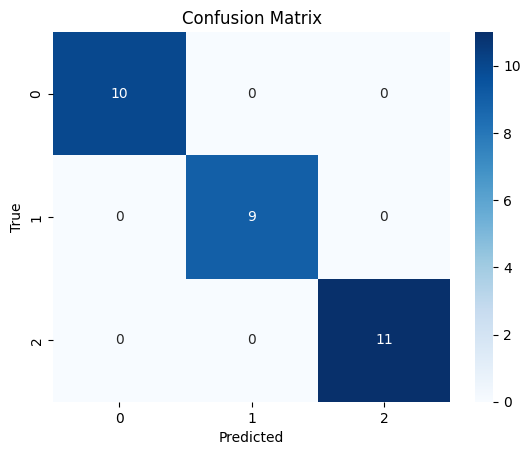

In [39]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 3. Support Vector Machine (SVM)


In [40]:
from sklearn.svm import SVC

# initialize the model
svm = SVC()

# fit the model
svm.fit(X_train, y_train)

SVC()

In [41]:
# make predictions
y_pred = svm.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 4. k-Nearest Neighbors (k-NN)


In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("k-NN Classification Report:\n", classification_report(y_test, y_pred_knn))

k-NN Accuracy: 1.0
k-NN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
k-NN Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Model Compasrion


In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize all models again for convenience (already done, but just summarizing)
logreg = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=42)
svm_model = SVC()
knn = KNeighborsClassifier(n_neighbors=3)

# Fit all models
models = {
    "Logistic Regression": logreg,
    "Decision Tree": dtree,
    "SVM": svm_model,
    "k-NN": knn
}

# Train each model and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")



--- Logistic Regression ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

--- Decision Tree ---
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 1

---


## Conclusion and Insights

-   **Simple Dataset**: The Iris dataset is small and well-structured, with clear separations between species based on features.

-   **Distinct Features**: Petal length and petal width are strong indicators that effectively differentiate the species.

-   **Balanced Classes**: The dataset contains an equal number of samples for each species, preventing class imbalance issues.

-   **Low Complexity**: The relationships among features are relatively simple, making it easier for models to capture patterns.

-   **Effective Algorithms**: All tested algorithms (Logistic Regression, Decision Tree, SVM, k-NN) are capable of perfectly fitting the training data.

-   **No Noise**: The dataset appears to have minimal noise or outliers, contributing to clearer decision boundaries for classification.

-   **Training Size**: The small size of the dataset allows for memorization by the models, leading to perfect accuracy on the training data.
